In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
from numpy.linalg import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline 

In [76]:
# параметры распределений
mu0 = np.array([-2.,1.])
mu1 = np.array([3.,-0.5])

In [77]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [78]:
d0 = torch.distributions.MultivariateNormal(torch.tensor(mu0.data), torch.eye(2))
d1 = torch.distributions.MultivariateNormal(torch.tensor(mu1.data), torch.eye(2))

In [79]:
d0.sample((10,))

tensor([[-0.9535,  0.1355],
        [-2.4994,  2.0781],
        [-1.4263, -0.0160],
        [-2.5699,  1.7179],
        [-1.6281,  1.0122],
        [-1.7958,  2.0933],
        [-1.5232,  0.9419],
        [-2.6959,  1.3748],
        [-3.2136,  1.9762],
        [-0.8404,  0.3259]])

In [80]:
d1.sample((10,))

tensor([[ 1.9810, -0.7160],
        [ 3.7283, -1.8922],
        [ 2.0719,  0.5956],
        [ 2.3700,  0.7142],
        [ 2.5052,  1.4917],
        [ 4.1125, -0.3184],
        [ 2.6300, -0.0754],
        [ 1.9737, -1.0958],
        [ 2.3068, -0.5736],
        [ 2.4525, -1.1388]])

In [81]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([ 0.2308, -0.5605]), tensor(0.5189)]


In [82]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.372249
Ошибка после 1 итераций: 0.238330
Ошибка после 2 итераций: 0.179742
Ошибка после 3 итераций: 0.147093
Ошибка после 4 итераций: 0.126424
Ошибка после 5 итераций: 0.112577
Ошибка после 6 итераций: 0.101045
Ошибка после 7 итераций: 0.092022
Ошибка после 8 итераций: 0.085957
Ошибка после 9 итераций: 0.079966
Ошибка после 10 итераций: 0.075354
Ошибка после 11 итераций: 0.071929
Ошибка после 12 итераций: 0.068019
Ошибка после 13 итераций: 0.065444
Ошибка после 14 итераций: 0.062280
Ошибка после 15 итераций: 0.059971
Ошибка после 16 итераций: 0.058057
Ошибка после 17 итераций: 0.056417
Ошибка после 18 итераций: 0.054145
Ошибка после 19 итераций: 0.052406


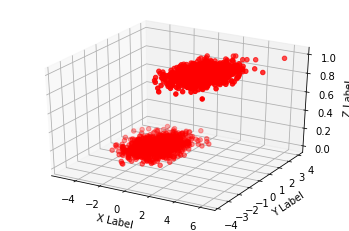

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
x, y = sample(d0, d1, 1024)
ax.scatter(xs=x[:,0], ys=x[:,1], zs=y, c='r')